In [25]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


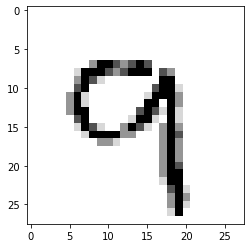

In [26]:
import matplotlib.pyplot as plt

image_index = 7676 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [29]:
import tensorflow as tf

# Importing the required Keras modules containing model and layers
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [30]:

# Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2151 - accuracy: 0.9339
Epoch 2/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0871 - accuracy: 0.9736
Epoch 3/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0625 - accuracy: 0.9806
Epoch 4/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0456 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0372 - accuracy: 0.9873
Epoch 6/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0290 - accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0259 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0206 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0180 - accuracy: 0.9

In [32]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05553966080444914, 0.9849]

0


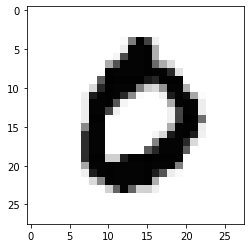

In [37]:
image_index = 3
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())